<a href="https://colab.research.google.com/github/alexmacharia/deep_learning_projects/blob/main/Medical_Images_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Course Project for Neural Networks by Mary Adewunmi

Submitted by: Alex Maina Macharia

Submitted on: 17th December 2022

In [1]:
# Connect to google drive

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# Import all the required libraries
import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras import layers
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
#%%matplotlib inline

import cv2


In [3]:
# Create variables for the train, test and validation data paths

train_path = "/content/gdrive/MyDrive/omdena_project/medical_images/train"
test_path = "/content/gdrive/MyDrive/omdena_project/medical_images/test"
val_path = "/content/gdrive/MyDrive/omdena_project/medical_images/val"


In [4]:
# Create variables for the desired dimensions (height, width) of the images as well as the training batch size

height = 150
width = 150
batch_size = 32

In [5]:
# Load training data

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(height, width),
    batch_size=batch_size)

Found 6326 files belonging to 4 classes.
Using 5061 files for training.


In [6]:
# Load validation data

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    val_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(height, width),
    batch_size=batch_size

)

Found 38 files belonging to 4 classes.
Using 7 files for validation.


In [7]:
# Load test data

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=(height, width),
    seed=42
    )

Found 771 files belonging to 4 classes.


In [8]:
class_names = train_data.class_names
num_classes = len(class_names)
num_classes

4

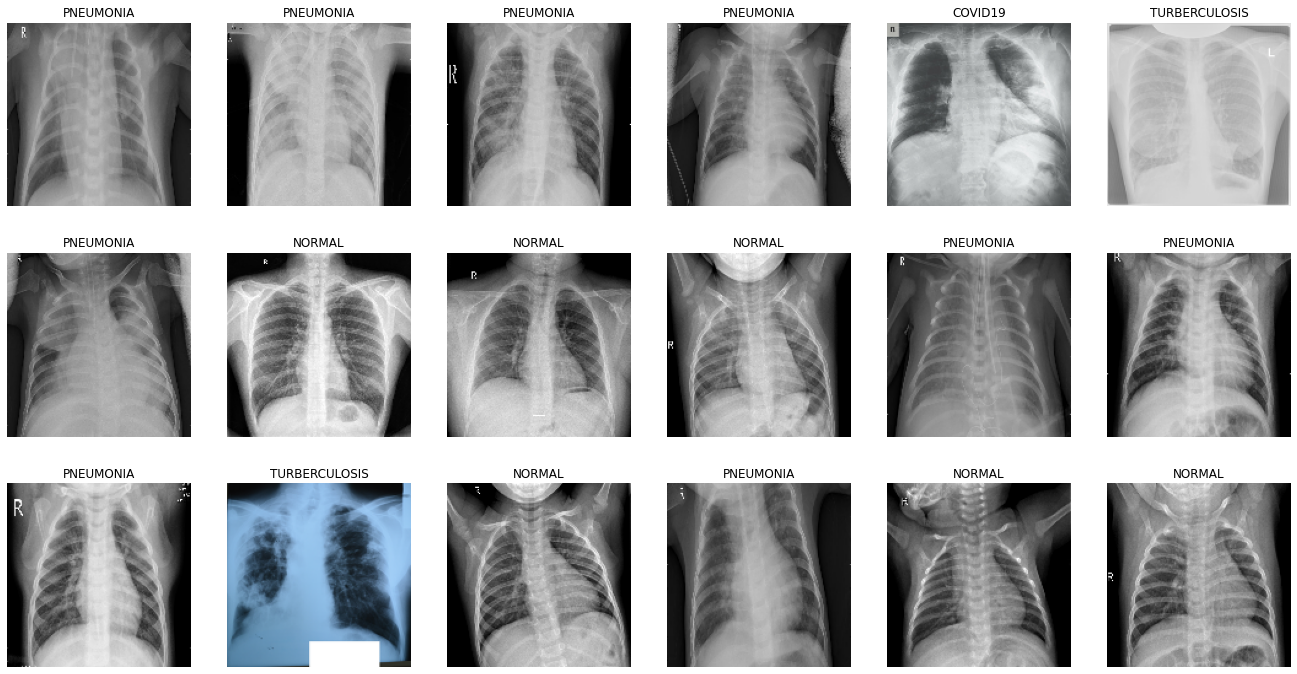

In [9]:
# Plot some images with their labels

plt.figure(figsize=(23, 12))
for images, labels in train_data.take(1):
    for i in range(18):
        ax = plt.subplot(3, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [10]:
# Print out the image dimensions

for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


In [11]:
for image_batch, labels_batch in val_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(7, 150, 150, 3)
(7,)


In [13]:
# Create the model

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(height, width, 3)),
    Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes)

])

In [14]:
# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [15]:
#Print out the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0

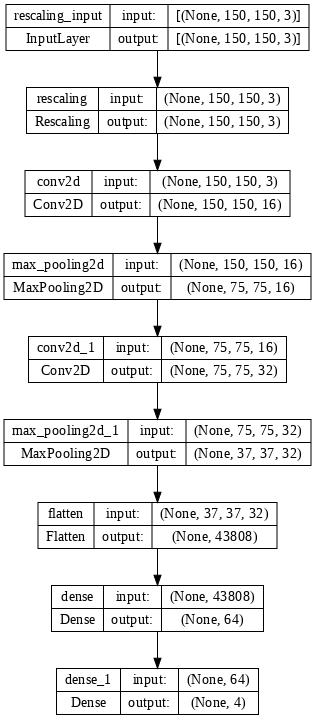

In [16]:
# Display a graphical representation of the model

tf.keras.utils.plot_model(model=model, dpi=72, show_shapes=True)

In [17]:
epochs = 15
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=epochs,
                    )

Epoch 1/15
159/159 [==============================] - 912s 6s/step - loss: 6.3673 - accuracy: 0.6017 - val_loss: 9.2103 - val_accuracy: 0.4286
Epoch 2/15
159/159 [==============================] - 107s 657ms/step - loss: 6.3663 - accuracy: 0.6050 - val_loss: 9.2103 - val_accuracy: 0.4286
Epoch 3/15
159/159 [==============================] - 110s 677ms/step - loss: 6.3663 - accuracy: 0.6050 - val_loss: 9.2103 - val_accuracy: 0.4286
Epoch 4/15
159/159 [==============================] - 143s 886ms/step - loss: 6.3663 - accuracy: 0.6050 - val_loss: 9.2103 - val_accuracy: 0.4286
Epoch 5/15
159/159 [==============================] - 116s 716ms/step - loss: 6.3663 - accuracy: 0.6050 - val_loss: 9.2103 - val_accuracy: 0.4286
Epoch 6/15
159/159 [==============================] - 124s 762ms/step - loss: 6.3663 - accuracy: 0.6050 - val_loss: 9.2103 - val_accuracy: 0.4286
Epoch 7/15
159/159 [==============================] - 110s 677ms/step - loss: 6.3663 - accuracy: 0.6050 - val_loss: 9.2103 - va

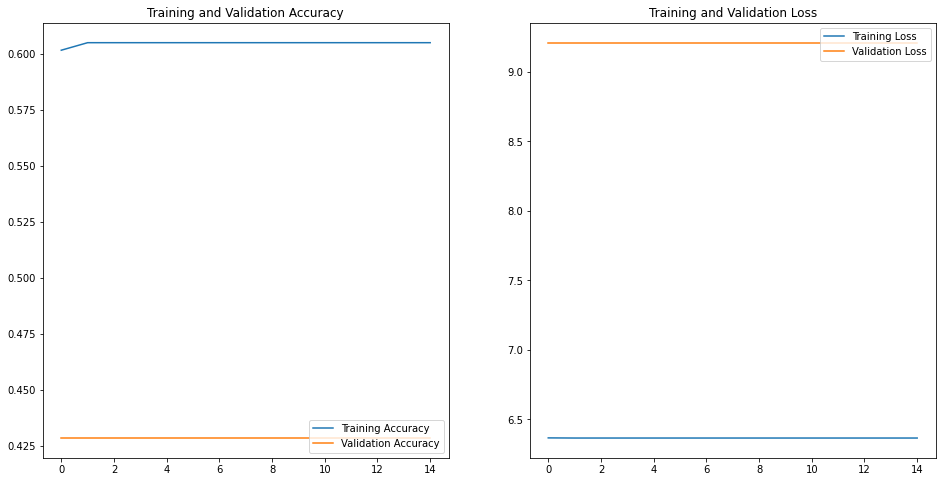

In [18]:
# Plot the  Accuracy and Loss graph for training and test data

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
# Create a variable to generate additional data for training through augmentation

data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (height,width,3)),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomZoom(0.1)
    ]
)

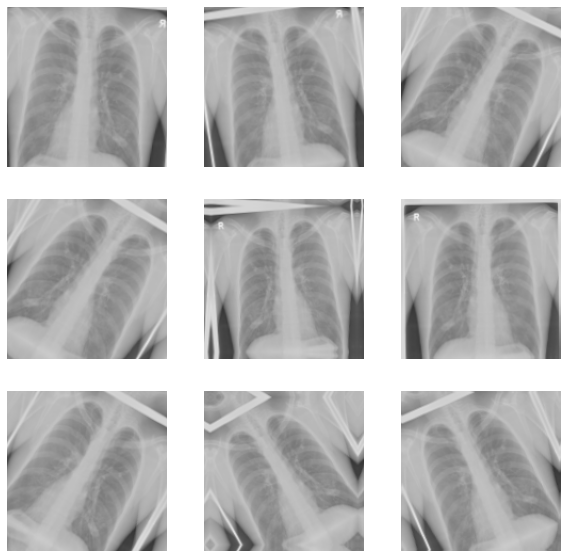

In [20]:
# Display augmented images

plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [21]:
# Create a new model using the augmented images to provide more data for training

model_v2 = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(height, width, 3)),
    Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(15, activation='relu'),
    Dense(num_classes, activation='softmax' )
])

In [22]:
# Compile the model

model_v2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [23]:
# Print out the model summary

model_v2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                  

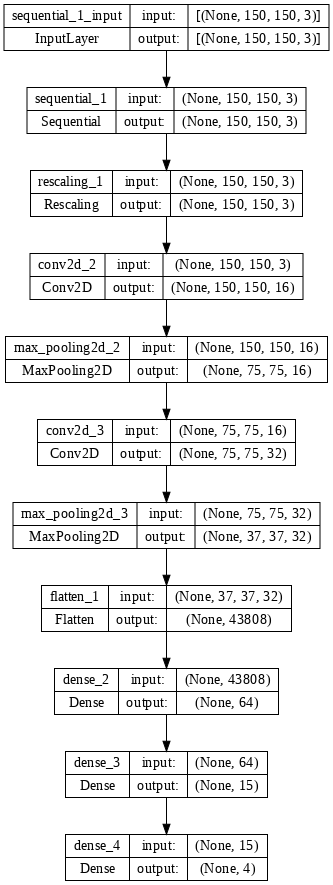

In [24]:
tf.keras.utils.plot_model(model=model_v2, dpi=72, show_shapes=True)

In [25]:
# Train the model

epochs = 20
history = model_v2.fit(
    train_data,
    validation_data = val_data,
    epochs = epochs
)

Epoch 1/20
159/159 [==============================] - 131s 807ms/step - loss: 0.7476 - accuracy: 0.7086 - val_loss: 0.8808 - val_accuracy: 0.7143
Epoch 2/20
159/159 [==============================] - 148s 912ms/step - loss: 0.4546 - accuracy: 0.8332 - val_loss: 0.7098 - val_accuracy: 0.7143
Epoch 3/20
159/159 [==============================] - 122s 752ms/step - loss: 0.3694 - accuracy: 0.8623 - val_loss: 0.9313 - val_accuracy: 0.7143
Epoch 4/20
159/159 [==============================] - 123s 762ms/step - loss: 0.3305 - accuracy: 0.8814 - val_loss: 0.8236 - val_accuracy: 0.7143
Epoch 5/20
159/159 [==============================] - 117s 721ms/step - loss: 0.2972 - accuracy: 0.8949 - val_loss: 1.0555 - val_accuracy: 0.5714
Epoch 6/20
159/159 [==============================] - 120s 738ms/step - loss: 0.2867 - accuracy: 0.8975 - val_loss: 1.0721 - val_accuracy: 0.7143
Epoch 7/20
159/159 [==============================] - 128s 793ms/step - loss: 0.2501 - accuracy: 0.9119 - val_loss: 1.1279 -

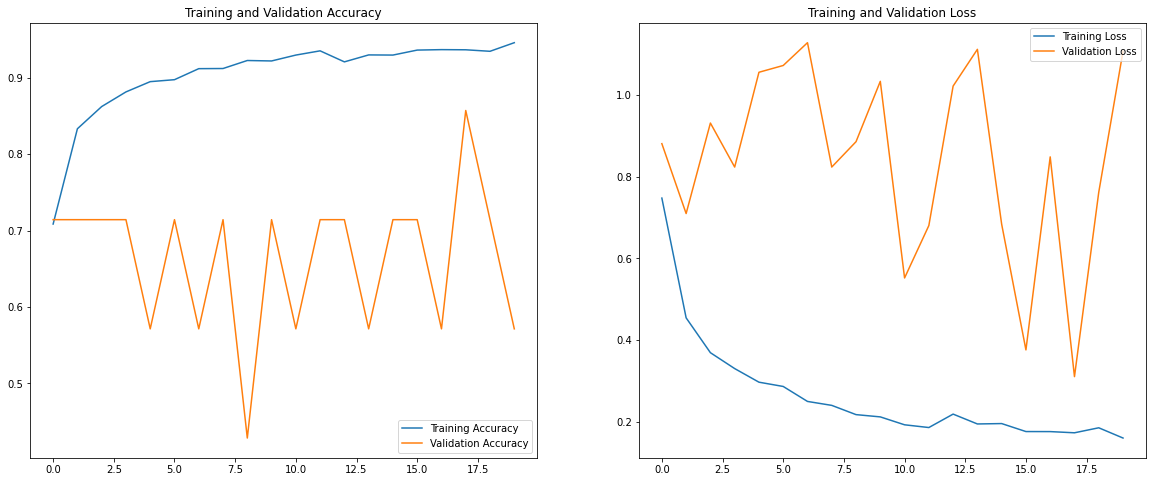

In [26]:
# Plot the model results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()